In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [9]:
df = pd.read_csv("Seed_Data.csv")

print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n\n")

print("--- Dataset Information ---")
df.info()

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Class names for display
class_names = np.sort(y.unique())


--- First 5 Rows of the Dataset ---
       A      P       C     LK     WK  A_Coef    LKG  target
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2  14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [10]:
# --- Step 3: Define Model and K-Fold Settings ---
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
model = GaussianNB()

print(f"Performing {k}-Fold Cross-Validation using Gaussian Naive Bayes...\n")

Performing 5-Fold Cross-Validation using Gaussian Naive Bayes...



In [11]:
# --- Step 4: Perform Cross-Validation ---
# cross_val_predict gives predicted values for each sample using KFold logic
y_pred = cross_val_predict(model, X, y, cv=kf)

In [12]:
# --- Step 5: Evaluate Model Performance ---
accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy (mean across {k} folds): {accuracy:.2%}")
print("\n--- Classification Report ---")
print(classification_report(y, y_pred, target_names=[str(c) for c in class_names]))

Overall Accuracy (mean across 5 folds): 90.48%

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        70
           1       0.94      0.94      0.94        70
           2       0.90      0.93      0.92        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210




Confusion matrix plot saved as 'confusion_matrix_kfold_bayes.png'


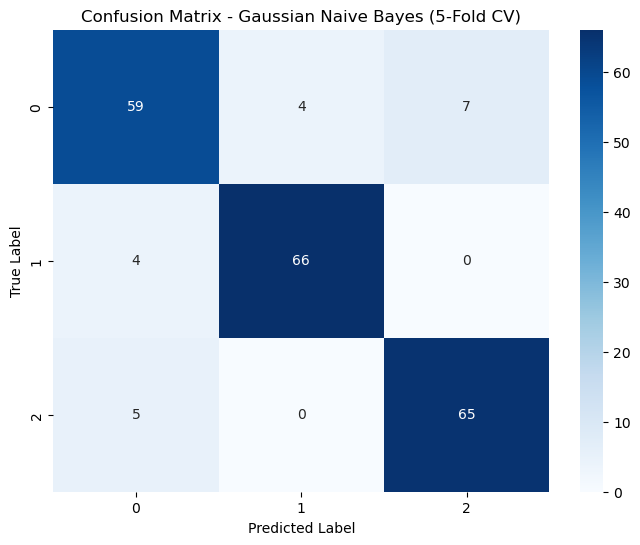

In [13]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - Gaussian Naive Bayes ({k}-Fold CV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion_matrix_kfold_bayes.png')
print(f"\nConfusion matrix plot saved as 'confusion_matrix_kfold_bayes.png'")